**KMEANS**

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

Читаем данные

In [2]:
df = pd.read_csv('Econom_Cities_data.csv', sep=';')

for col in ['Work', 'Price', 'Salary']:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

Строим гистограммы распределения

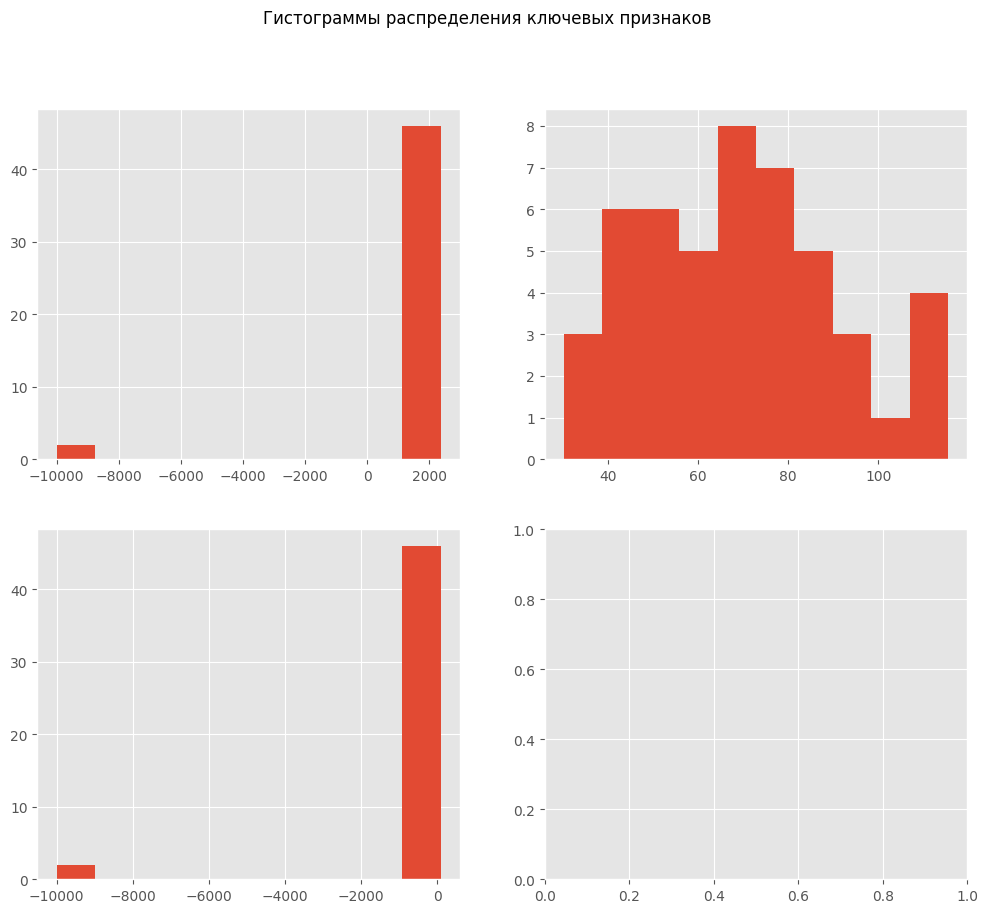

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

ax[0, 0].hist(df['Work'])
ax[0, 1].hist(df['Price'])
ax[1, 0].hist(df['Salary'])

fig.suptitle('Гистограммы распределения ключевых признаков')

plt.show()

Убираем выбросы, стандартизируем

In [4]:
from sklearn.preprocessing import StandardScaler

df_no_otliers = df[(df['City'] != 'Cairo') & (df['City'] != 'Jakarta')].copy()

scaler = StandardScaler()

X_no_outliers = df_no_otliers[['Work', 'Price', 'Salary']].copy()
X_no_outliers[['Work', 'Price', 'Salary']] = scaler.fit_transform(X_no_outliers[['Work', 'Price', 'Salary']])

Обучим KMEANS с размером кластеров от 2 до 25

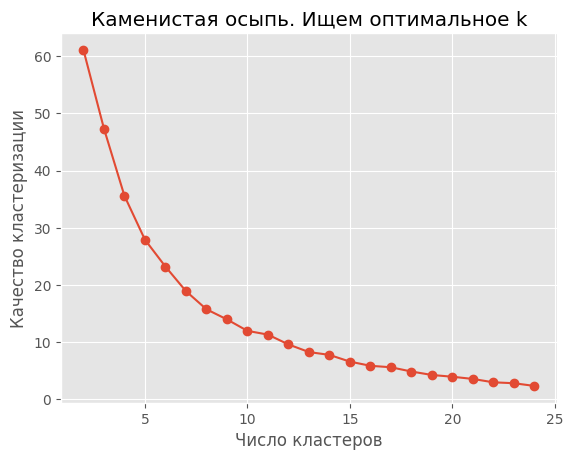

In [5]:
from sklearn.cluster import KMeans


K = range(2, 25)
models = [KMeans(n_clusters=k, random_state=42, max_iter=300, n_init=10, 
               verbose=0, tol=0.0001).fit(X_no_outliers) for k in K]

dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Качество кластеризации')
plt.title('Каменистая осыпь. Ищем оптимальное k')

plt.show()

После шестой точки (шесть кластеров) заметно, что качество кластеризации не сильно становится лучше - по горизонтали точки почти не становятся ниже. Выберем 6 кластеров.

In [6]:

model = KMeans(n_clusters=6, random_state=42, max_iter=300, n_init=10, 
               verbose=0, tol=0.0001)
model.fit(X_no_outliers)
X_no_outliers['cluster'] = model.labels_


In [7]:
clusters = X_no_outliers.copy()
clusters[['Work', 'Price', 'Salary']] = scaler.inverse_transform(clusters[['Work', 'Price', 'Salary']])
clusters.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
0,2202.800000,43.100000,11.700000
1,1732.000000,78.135714,53.614286
2,1798.857143,50.942857,19.214286
3,1780.500000,108.550000,71.300000
4,1999.250000,55.487500,14.475000
5,1990.833333,77.233333,55.316667


В 0 кластер попадают те, кто много работают и мало зарабатывают

В 1 кластере те, кто работает меньше, зарабатывает больше и тратит значительно больше

Во 2 кластере люди работают среднее по кластерам значение, но у них высокие цены и довольно низкие зарплаты. Похожи на первый кластер, но работают меньше

В 3 кластере города, вкоторых самые большие зарплаты и цены

В четвертом кластере люди, которые живут в дорогих местах, но с низкими зарплатами. Работают они тоже больше среднего

В 5 кластере люди много работают, похожи на четвертый кластер, но соотношение зарплаты/стоимости жизни у них уже лучше


In [8]:
from make_map import plot_clusters_on_map

plot_clusters_on_map(df_no_otliers, clusters, 'kmeans_clusters_map_6.html')